In [1]:
import numpy as np

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from vogn_utils import train_model_cc_fast,csvDataset,ToTensor
import torch.nn.functional as F


import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from vogn_utils import train_model_cc_fast,csvDataset,ToTensor
import torch.nn.functional as F


class EvalNet(nn.Module):
    def __init__(self, in_size=8, dropout_rate=None):
        super(type(self), self).__init__()
        self.dropout = dropout_rate
        if dropout_rate:
            self.dropout = nn.Dropout(dropout_rate)
        self.f1 = nn.Linear(in_size, 64)
        self.f2 = nn.Linear(64,  128)
        self.f3 = nn.Linear(128,  128)
        self.f4 = nn.Linear(128,  1)

    def forward(self, x):
        out = x
        out = F.relu(self.f1(out))
        if self.dropout:
            out = self.dropout(out)
        out = F.relu(self.f2(out))
        if self.dropout:
            out = self.dropout(out)
        out =self.f3(out)
        out =self.f4(out)
        return out  
    
correct = np.zeros(100)
for x in range(100):
    
    model = EvalNet()
    optimizer = optim.Adam(model.parameters(), weight_decay=0.0001*x)

    use_cuda = torch.cuda.is_available()
    inference_dataset = csvDataset(Xtest,Ytest,transform= ToTensor())
    inference_loader = torch.utils.data.DataLoader(inference_dataset,batch_size=Xtest.shape[0], shuffle=False)
    file_dataset = csvDataset(Xtrain,Ytrain,transform= ToTensor())
    final_loader = torch.utils.data.DataLoader(file_dataset,batch_size=Xtrain.shape[0], shuffle=False)

    if use_cuda:
        model = model.float().cuda()

    criterion = F.binary_cross_entropy_with_logits
    model, train_loss, train_accuracy = train_model_cc_fast(model, [final_loader, final_loader], criterion,
    optimizer, num_epochs=50)
    model.eval()
    with torch.no_grad():
        for i in inference_loader:
            inputs = i['data']
            labels = i['label']
            if use_cuda:
                inputs, labels = inputs.cuda(), labels.cuda()
            out = model.forward(inputs)
            pred = (out.cpu().numpy()>0)*1.
            labels = (labels.cpu().numpy())*1.

    correct[x] =(np.sum(pred==labels)/Xtest.shape[0])
    
    plt.plot(np.arange(100)/10000,correct)

In [2]:
Xtrain = np.load('Rail2Rail_OPA_v1/trainx.npy')
Ytrain = np.load('Rail2Rail_OPA_v1/trainy.npy')*1.
Xtest = np.load('Rail2Rail_OPA_v1/testx.npy')
Ytest = np.load('Rail2Rail_OPA_v1/testy.npy')*1.


for i in range(9):
    Xtrain[:,i]=(Xtrain[:,i] - Xtrain[:,i].mean())/(Xtrain[:,i].std())
    Xtest[:,i]=(Xtest[:,i] - Xtest[:,i].mean())/(Xtest[:,i].std())
Ytrain = Ytrain.reshape(-1,1)
Ytest = Ytest.reshape(-1,1) 


In [5]:
Xtrain.shape

(9472, 16)

In [6]:
class EvalNet(nn.Module):
    def __init__(self, in_size=16, dropout_rate=None):
        super(type(self), self).__init__()
        self.dropout = dropout_rate
        if dropout_rate:
            self.dropout = nn.Dropout(dropout_rate)
        self.f1 = nn.Linear(in_size, 64)
        self.f2 = nn.Linear(64,  128)
        self.f3 = nn.Linear(128,  128)
        self.f4 = nn.Linear(128,  1)

    def forward(self, x):
        out = x
        out = F.relu(self.f1(out))
        if self.dropout:
            out = self.dropout(out)
        out = F.relu(self.f2(out))
        if self.dropout:
            out = self.dropout(out)
        out =self.f3(out)
        out =self.f4(out)
        return out  

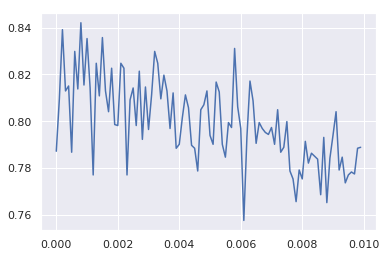

In [7]:
correct = np.zeros(100)
for x in range(100):
    
    model = EvalNet()
    optimizer = optim.Adam(model.parameters(), weight_decay=0.0001*x)

    use_cuda = torch.cuda.is_available()
    inference_dataset = csvDataset(Xtest,Ytest,transform= ToTensor())
    inference_loader = torch.utils.data.DataLoader(inference_dataset,batch_size=Xtest.shape[0], shuffle=False)
    file_dataset = csvDataset(Xtrain,Ytrain,transform= ToTensor())
    final_loader = torch.utils.data.DataLoader(file_dataset,batch_size=Xtrain.shape[0], shuffle=False)

    if use_cuda:
        model = model.float().cuda()

    criterion = F.binary_cross_entropy_with_logits
    model, train_loss, train_accuracy = train_model_cc_fast(model, [final_loader, final_loader], criterion,
    optimizer, num_epochs=50)
    model.eval()
    with torch.no_grad():
        for i in inference_loader:
            inputs = i['data']
            labels = i['label']
            if use_cuda:
                inputs, labels = inputs.cuda(), labels.cuda()
            out = model.forward(inputs)
            pred = (out.cpu().numpy()>0)*1.
            labels = (labels.cpu().numpy())*1.

    correct[x] =(np.sum(pred==labels)/Xtest.shape[0])
    
plt.plot(np.arange(100)/10000,correct)